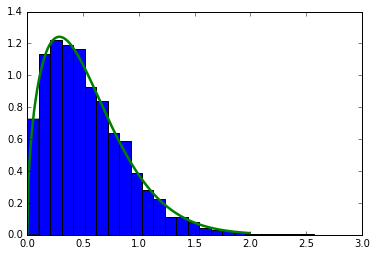

In [32]:
%matplotlib inline 
import matplotlib.pyplot as plt
import math

def  congruencial(x0):
    a = 1664525
    b = 1013904223
    m = 2**32
    xi = x0
    ui =0
    xi = (a*xi + b)%(m)
    ui = float(xi)/float(m)

    return ui,xi

def weibull(iteraciones,k,lamda,semilla):
    x0 = semilla
    x = []
    for i in range(iteraciones):
        p,x0 = congruencial(x0)
        
        prov = lamda*(-math.log(1-p))**(1/k)
        x.append(prov)
        
    return x

def weibullteorico(iteraciones,k,lamda):
    teoricoX = []
    teoricoY = []
    iteraciones = iteraciones*100
    for i in range(iteraciones):
      
        x = float(float(i)/100.0)
        
        numY = (k/lamda)*(x/lamda)**(k-1)*math.exp(-(x/lamda)**k)
        teoricoY.append(numY)
        teoricoX.append(x)
        
    return teoricoX,teoricoY
    
iteraciones = 5000


lamda = 0.6
k = 1.5
semilla = 9
rango = 2
ax = plt.gca()
weibull = weibull(iteraciones,k,lamda,semilla)

weibullX,weibullY = weibullteorico(rango,k,lamda)

count, bins, ignored = plt.hist(weibull, 25, normed=True,color = 'blue')
ax.plot(weibullX,weibullY,'green',linewidth=2.5)
plt.show()